<a href="https://colab.research.google.com/github/JK-the-Ko/Thermo-Fluid-Dynamics-Experiment/blob/main/2022-2/%EC%97%B4%EC%9C%A0%EC%B2%B4%EA%B3%B5%ED%95%99%EC%8B%A4%ED%97%98_Week_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CuPy

#### Import Library

In [1]:
import cupy as cp
import numpy as np

#### Check CuPy Library Version

In [ ]:
cp.__version__

## Check GPU Device

In [ ]:
!nvidia-smi

In [4]:
device = cp.cuda.Device(0)

### GPU ID

In [ ]:
device.id

### GPU Memory Info



In [ ]:
device.mem_info

## Cupy Array Instantiation

### With NumPy Array

In [7]:
np.random.seed(0)

In [ ]:
npArray = np.random.randn(3, 3, 3)
npArray

In [ ]:
cpArray = cp.array(npArray)
cpArray

In [ ]:
cpArray.device

### With CuPy Class

In [ ]:
cpArray = cp.ones((3, 3, 3))
cpArray

In [ ]:
cpArray.device

## Cupy Array Method

In [ ]:
cpArray = cp.array(np.random.randn(5, 5))
cpArray

### Flatten Method

In [ ]:
print(cpArray.flatten())
print(f"Array Shape : {cpArray.flatten().shape}")

### Statistic Method

In [ ]:
print(cpArray.max())
print(type(cpArray.max()))

In [ ]:
print(cpArray.mean())
print(cpArray.mean().device)

### Copy Method

In [ ]:
cpArray1 = cpArray
cpArray2 = cpArray.copy()
print(f"Array Memory : {hex(id(cpArray))}")
print(f"Array1 Memory : {hex(id(cpArray1))}")
print(f"Array2 Memory : {hex(id(cpArray2))}")

#### Reshape Method

In [ ]:
print(cpArray.reshape(1, 25))
print(cpArray.reshape(1, 25).shape)

### Sort Method

In [ ]:
cpArray.sort()
cpArray

### Get Method

In [ ]:
print(cpArray.get())
type(cpArray.get())

## CuPy Operation with Difference Device

### NumPy + CuPy Combination

In [21]:
npArray = np.ones((5, 5))
cpArray = cp.ones((5, 5))

In [ ]:
npArray + cpArray

## NumPy vs. CuPy

### 10 x 10 Array

In [153]:
array1, array2 = np.random.randn(10, 10), np.random.randn(10, 10)

In [154]:
cpArray1, cpArray2 = cp.array(array1), cp.array(array2)

#### Matrices Summation 

In [ ]:
%timeit array1 + array2

In [ ]:
%timeit cpArray1 + cpArray2

#### Matrices Multiplication

In [ ]:
%timeit np.matmul(array1, array2)

In [ ]:
%timeit cp.matmul(cpArray1, cpArray2)

### 500 x 500 Array

In [29]:
array1, array2 = np.random.randn(500, 500), np.random.randn(500, 500)

In [30]:
cpArray1, cpArray2 = cp.array(array1), cp.array(array2)

#### Matrices Summation 

In [ ]:
%timeit array1 + array2

In [ ]:
%timeit cpArray1 + cpArray2

#### Matrices Multiplication

In [ ]:
%timeit np.matmul(array1, array2)

In [ ]:
%timeit cp.matmul(cpArray1, cpArray2)

## CuPy 실습

### 1-D Analog Signal의 노이즈를 제거해주는 Moving Average Filter를 NumPy 및 CuPy로 제작하세요.

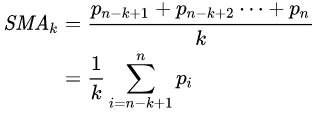

#### Generate Noisy Signal

##### Gaussian Noise with 1 Mean and 0.3 Standard Deviation

In [100]:
x = np.arange(0, 8 * np.pi, 0.01)
y = np.sin(x) + 0.09 * np.random.randn(x.shape[0])

#### Plot Graph

In [101]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Original Signal")
plt.show()

#### NumPy Implementation

##### Design Moving Average Filter (MAF)


In [103]:
def movingAverageFilter(inputSignal: np.array) :
  outputSignal = inputSignal.copy()

  for i in range(len(inputSignal)) :
    if i == 0 :
      outputSignal[i] = outputSignal[i]
    elif i == 1 :
      outputSignal[i] = (outputSignal[i] + outputSignal[i-1]) / 2
    else :
      outputSignal[i] = (outputSignal[i] + outputSignal[i-1] + outputSignal[i-2]) / 3
    
  return outputSignal

##### Apply MAF

In [104]:
yProcessed = movingAverageFilter(y)

In [ ]:
print(f"Memory Address : {hex(id(y))}")
print(f"Memory Address : {hex(id(yProcessed))}")

##### Plot Graph

In [ ]:
plt.plot(x, yProcessed)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Denoised Signal")
plt.show()

##### Compare Result

In [ ]:
plt.plot(x, y, label = "original")
plt.plot(x, yProcessed, label = "denoised")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Result Comparison")
plt.legend(loc = "best")
plt.show()

#### CuPy Implementation

##### Design Moving Average Filter (MAF)


In [109]:
def movingAverageFilter(inputSignal: cp.array) :
  outputSignal = inputSignal.copy()

  for i in range(len(inputSignal)) :
    if i == 0 :
      outputSignal[i] = outputSignal[i]
    elif i == 1 :
      outputSignal[i] = (outputSignal[i] + outputSignal[i-1]) / 2
    else :
      outputSignal[i] = (outputSignal[i] + outputSignal[i-1] + outputSignal[i-2]) / 3
    
  return outputSignal

##### Apply MAF

In [110]:
y = cp.array(y)

In [111]:
yProcessed = movingAverageFilter(y)

In [ ]:
print(f"Memory Address : {hex(id(y))}")
print(f"Memory Address : {hex(id(yProcessed))}")

##### Plot Graph

In [ ]:
# Code Block

##### Compare Result

In [ ]:
# Code Block